In [1]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

<ipython-input-12-a7cfe371a85b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)


In [16]:
data.head()

,value
month,
1950-01-01,-0.0603
1950-02-01,0.6268
1950-03-01,-0.0081
1950-04-01,0.5551
1950-05-01,0.0716


In [15]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', axis = 1)

In [17]:
data.head()

,value
month,
1950-01-01,-0.0603
1950-02-01,0.6268
1950-03-01,-0.0081
1950-04-01,0.5551
1950-05-01,0.0716


In [18]:
data['1950':'1952'] #What do you notice about the range of dates?

,value
month,
1950-01-01,-0.0603
1950-02-01,0.6268
1950-03-01,-0.0081
1950-04-01,0.5551
1950-05-01,0.0716
1950-06-01,0.5386
1950-07-01,-0.8025
1950-08-01,-0.8510
1950-09-01,0.3580


In [ ]:
# What is the empirical range of dates?

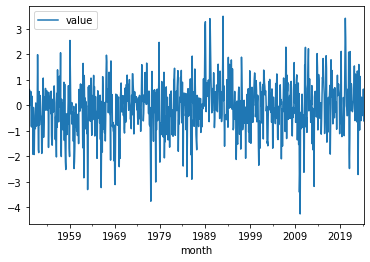

In [19]:
# How to visualize?
data.plot()

In [20]:
# What kind of index do we have?
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
data['1951-11-11':'1951-11-12']

,value
month,


In [22]:
# What if we want a period index?
data_pd = data.to_period()

In [23]:
data_pd['1951-11-11':'1951-11-12']

,value
month,
1951-11,-0.0685


In [24]:
data_pd['1951-11-11':'1952-01-12']

,value
month,
1951-11,-0.0685
1951-12,1.9872
1952-01,0.3682


In [ ]:
# Which is more appropriate for this data?

In [ ]:
# How do various data loads perform?
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

In [ ]:
# What if you already have the data frame and want to parse columns?
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

In [ ]:
pd.to_datetime(df)

In [ ]:
pd.to_datetime(df[['year', 'month', 'day']])

In [ ]:
# Does it work with other column names?

In [ ]:
# Go get your own time series data, load it in, and see what you can see
# Hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [ ]:
# 1. plot 2. get range of dates 3. convert between time and period index

In [ ]:
# Let's experiment with truncate convenience function
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='10/31/2015', after='12/31/2015')

In [ ]:
# You can truncate in a way that breaks frequency
ts[[0, 2, 6]].index

In [ ]:
# It will save you when it can
ts.ix[0:10:2].index